![New York City schoolbus](schoolbus.jpg)

Photo by [Jannis Lucas](https://unsplash.com/@jannis_lucas) on [Unsplash](https://unsplash.com).
<br>

Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a maximum score of 800 points. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

You have been provided with a dataset called `schools.csv`, which is previewed below.

You have been tasked with answering three key questions about New York City (NYC) public school SAT performance.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the data
schools = pd.read_csv("schools.csv")

# Preview the data
schools.head()

# Start coding here...

# Which schools are best for math?
best_math_schools = schools[schools["average_math"] >= 640][["school_name", "average_math"]].sort_values("average_math", ascending=False)

# Calculate total_SAT per school
schools["total_SAT"] = schools["average_math"] + schools["average_reading"] + schools["average_writing"]

# Who are the top 10 performing schools?
top_10_schools = schools.groupby("school_name")["total_SAT"].mean().reset_index().sort_values("total_SAT", ascending=False).head(10)

# Which NYC borough has the highest standard deviation for total_SAT?
boroughs = schools.groupby("borough")["total_SAT"].agg(["count", "mean", "std"]).round(2)

# Filter for max std and reset index so borough is a column
largest_std_dev = boroughs[boroughs["std"] == boroughs["std"].max()]

# Rename the columns for clarity
largest_std_dev = largest_std_dev.rename(columns={"count": "num_schools", "mean": "average_SAT", "std": "std_SAT"})

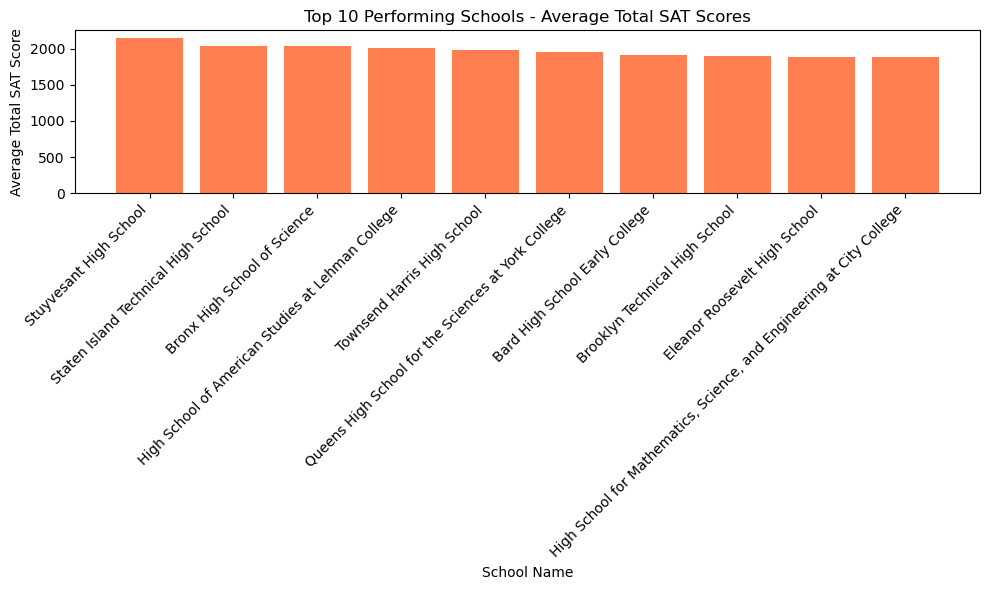

In [6]:
# Bar Chart for Top 10 Performing Schools
plt.figure(figsize=(10, 6))
plt.bar(top_10_schools["school_name"], top_10_schools["total_SAT"], color='coral')
plt.title('Top 10 Performing Schools - Average Total SAT Scores')
plt.xlabel('School Name')
plt.ylabel('Average Total SAT Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

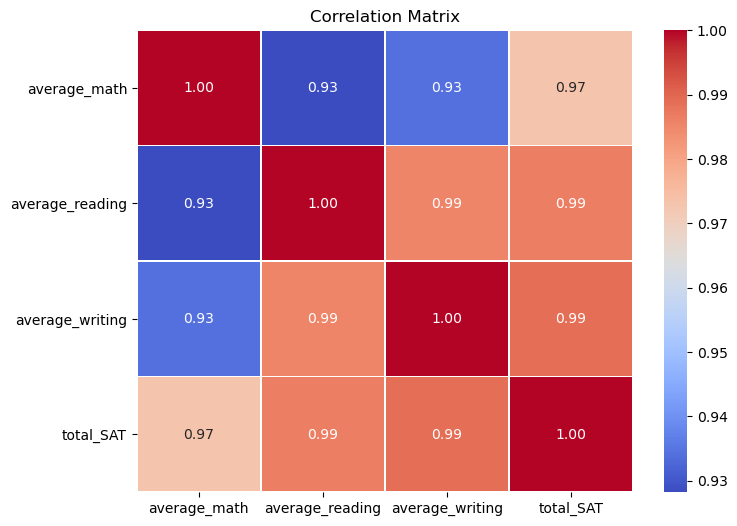

In [11]:
# Calculate correlation matrix
correlation_matrix = schools[correlation_columns].corr()

# Heatmap for Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

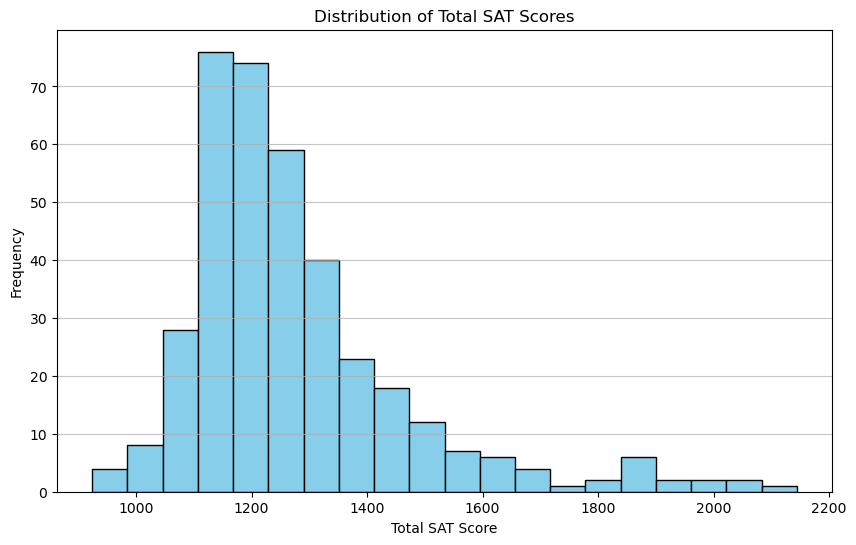

In [12]:
# Histogram for Distribution of Total SAT Scores
plt.figure(figsize=(10, 6))
plt.hist(schools["total_SAT"], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Total SAT Scores')
plt.xlabel('Total SAT Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()